## Информация о датасете

Набор данных о покупательских намерениях онлайн-покупателей.

## Импорт библиотек и загрузка данных

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
SHOPPERS_DATASET = "/content/drive/MyDrive/MAGA/EDA/online_shoppers_intention.csv"

In [48]:
df = pd.read_csv(SHOPPERS_DATASET)

## Описание данных

Набор данных состоит из 14 числовых и 4 категориальных атрибутов.

Атрибут "Revenue" ("Доход") может использоваться в качестве целевой переменной.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" и "Product Related Duration" представляют количество различных типов страниц, посещенных посетителем в течение данного сеанса, и общее время, проведенное на каждой из этих категорий страниц. Значения этих функций выводятся из информации об URL-адресах посещаемых пользователем страниц и обновляются в режиме реального времени, когда пользователь выполняет какое-либо действие, например, переходит с одной страницы на другую.

Функции "Bounce Rate", "Exit Rate" и "Page Value" представляют собой показатели, измеряемые Google Analytics для каждой страницы сайта электронной коммерции. Значение параметра "Bounce Rate" для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его. Значение функции "Exit Rate" для конкретной веб-страницы рассчитывается как процент всех просмотров страницы, которые были последними в сеансе. Функция "Page Value" представляет собой среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции.

Функция "Special Day" указывает на близость времени посещения сайта к определенному особому дню (например, дню матери), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как промежуток времени между датой заказа и датой доставки. Например, для дня Святого Валентина это значение принимает ненулевое значение в период со 2 по 12 февраля, нулевое значение до и после этой даты, если только она не близка к другому особому дню.

Набор данных также включает месяц года, операционную систему, браузер, регион, тип трафика, тип посетителя, возвращающегося или нового посетителя, наличие выходного дня.

* Administrative - Административный (числовой тип)
* Administrative Duration	- Административный, продолжительность (числовой тип)
* Informational - Информационный (числовой тип)
* Informational Duration - Информационный, продолжительность (числовой тип)
* Product Related	- Связанный с продуктом (числовой тип)
* Product Related Duration - Связанный с продуктом, продолжительность (числовой тип)
* Bounce Rates - Количество отказов (числовой тип)
* Exit Rates - Количество выходов (числовой тип)
* Page Values - Количество просмотров страниц (числовой тип)
* Special Day	- Особый день (числовой тип)
* Month	- Месяц (категориальный тип)
* Operating Systems	- Операционная система (числовой тип)
* Browser	- Браузер (числовой тип)
* Region - Регион (числовой тип)
* Traffic Type - Тип трафика (числовой тип)
* Visitor Type - Тип посетителя (категориальный тип)
* Weekend - Наличие выходного (категориальный тип)
* Revenue - Доход (категориальный тип)

## Исследование данных
Пропусков данных нету ни по одному признаку. Количество дублирующих записей - 125, их нужно удалить, т.к. они не несут никакой нужной информации. Признак "Month" лучше не кодировать через LabelEncoder, т.к. порядок у месяцев не должен быть значимым, поэтому будет использован OneHotEncoder. Признак "VisitorType" можно закодировать, новым пользователям будет присвоено значение 0, а вернувшимся - 1 (для значения "Other" тоже будет значение 1, т.к. это не новый пользователь).





In [49]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [51]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [52]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [53]:
print("Число дубликатов:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Число дубликатов: 125


In [54]:
# новое указание индексов после удаления дубликатов
df.reset_index(inplace=True, drop=True)

In [55]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [56]:
from sklearn.preprocessing import OneHotEncoder

oneHotEnc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# двумерная матрица с энкодом
month_encoded = oneHotEnc.fit_transform(df[['Month']])

# формирование датафрейма
month_df = pd.DataFrame(month_encoded, columns=oneHotEnc.get_feature_names_out(['Month']))

# конкатенация датафреймов
df = pd.concat([df, month_df], axis=1)

print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... Month_Aug  Month_Dec  \
0         0.20       0.20         0.0         0.0  ...       0.0        0.0   
1         0.00       0.10         0.0         0.0  ...

In [57]:
df['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10431
New_Visitor,1693
Other,81


In [58]:
visitor_map = {'Returning_Visitor': 1, 'Other': 1, 'New_Visitor': 0}
df['VisitorType_mapped'] = df['VisitorType'].map(visitor_map)
df['VisitorType_mapped']

,VisitorType_mapped
0,1
1,1
2,1
3,1
4,1
...,...
12200,1
12201,1
12202,1
12203,1


In [59]:
df['Weekend'].value_counts()

,count
Weekend,
False,9346
True,2859


In [60]:
weekend_map = {False: 0, True: 1}
df['Weekend_mapped'] = df['Weekend'].map(weekend_map)
df['Weekend_mapped']

,Weekend_mapped
0,0
1,0
2,0
3,0
4,1
...,...
12200,1
12201,1
12202,1
12203,0


In [61]:
df['Revenue'].value_counts()

,count
Revenue,
False,10297
True,1908


In [62]:
revenue_map = {False: 0, True: 1}
df['Revenue_mapped'] = df['Revenue'].map(revenue_map)
df['Revenue_mapped']

,Revenue_mapped
0,0
1,0
2,0
3,0
4,0
...,...
12200,0
12201,0
12202,0
12203,0


In [63]:
df = df.drop(columns=['Month', 'VisitorType', 'Weekend', 'Revenue'])

Данные по целевой переменной "Revenue" не сбалансированы: для False 10297 элементов, для True 1908 элементов. В таком случае можно использовать методы under-sampling и/или over-sampling.

In [64]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Revenue_mapped'])
y = df['Revenue_mapped']

# Разделяем данные (обязательно с stratify!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape
y_train.value_counts()

,count
Revenue_mapped,
0,8238
1,1526


In [65]:
# применяем SMOTE только к тренировочным данным
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
# X_train_balanced, y_train_balanced = X_train, y_train

In [66]:
y_train_balanced.value_counts()

,count
Revenue_mapped,
1,8238
0,8238


In [67]:
# в feature importances самый влиятельный признак - PageValues, остальные параметры почти не значимы
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=43)
random_forest.fit(X_train_balanced, y_train_balanced)

feature_importances_series = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances_series

,Feature,Importance
8,PageValues,0.631918
21,Month_Nov,0.058442
5,ProductRelated_Duration,0.047545
7,ExitRates,0.031575
4,ProductRelated,0.029222
1,Administrative_Duration,0.024614
6,BounceRates,0.023468
0,Administrative,0.018106
23,Month_Sep,0.016441
12,Region,0.012837


In [68]:
# в permutation importance выделяются 3 параметра: PageValues, Month_Nov, ProductRelated_Duration
from sklearn.inspection import permutation_importance

res = permutation_importance(random_forest, X_train_balanced, y_train_balanced, n_repeats=10, n_jobs=-1, random_state=35)

permutation_importances_series = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': res['importances_mean']
}).sort_values(by='Importance', ascending=False)
permutation_importances_series

,Feature,Importance
8,PageValues,0.761139
21,Month_Nov,0.424970
5,ProductRelated_Duration,0.116862
20,Month_May,0.100232
7,ExitRates,0.093025
15,Month_Dec,0.079851
23,Month_Sep,0.070191
4,ProductRelated,0.065415
6,BounceRates,0.057534
17,Month_Jul,0.048394


In [69]:
# в feature importances самый влиятельный признак - PageValues, остальные параметры почти не значимы
from sklearn.ensemble import GradientBoostingRegressor

random_gb = GradientBoostingRegressor(random_state=43)
random_gb.fit(X_train_balanced, y_train_balanced)

feature_importances_series = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': random_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances_series

,Feature,Importance
8,PageValues,0.794436
21,Month_Nov,0.087879
5,ProductRelated_Duration,0.015576
20,Month_May,0.014253
15,Month_Dec,0.010573
24,VisitorType_mapped,0.010567
23,Month_Sep,0.009930
0,Administrative,0.008466
4,ProductRelated,0.007561
6,BounceRates,0.006703


In [70]:
# в permutation importance выделяются 3 параметра: PageValues, Month_Nov
from sklearn.inspection import permutation_importance

res = permutation_importance(random_gb, X_train_balanced, y_train_balanced, n_repeats=10, n_jobs=-1, random_state=35)

permutation_importances_series = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': res['importances_mean']
}).sort_values(by='Importance', ascending=False)
permutation_importances_series

,Feature,Importance
8,PageValues,0.756639
21,Month_Nov,0.216820
20,Month_May,0.028864
15,Month_Dec,0.021277
5,ProductRelated_Duration,0.015126
23,Month_Sep,0.013928
24,VisitorType_mapped,0.010660
22,Month_Oct,0.010660
0,Administrative,0.009126
17,Month_Jul,0.009014


# ТЕСТИРОВКА

In [71]:
# случайный лес

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

parameters = {
    'n_estimators': [150, 200], # количество деревьев
    'max_depth': [18, 21, 25, 27] # максимальная глубина деревьев
}

# выбор модели с лучшими параметрами, сравнение по метрике roc_auc
rf = RandomForestClassifier(random_state=43, n_jobs=-1, class_weight='balanced')
grid_search = GridSearchCV(rf, parameters, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Лучшие параметры: {'max_depth': 25, 'n_estimators': 200}



Метрики:
ROC-AUC: 0.93
Accuracy: 0.9
Precision: 0.67
Recall: 0.7
F1-Score: 0.68


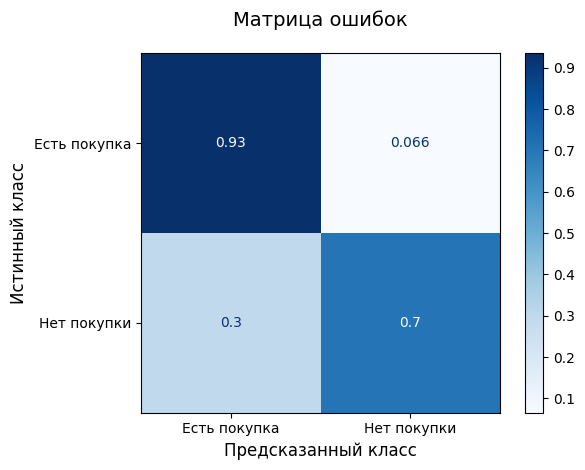

In [72]:
print("\nМетрики:")
print("ROC-AUC:", round(roc_auc_score(y_test, y_pred_proba), 2))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1-Score:", round(f1_score(y_test, y_pred), 2))

# матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=(conf_matrix.T / conf_matrix.sum(axis=1)).T,
    display_labels=['Есть покупка', 'Нет покупки']
)

ax = disp.plot(cmap='Blues')

ax.ax_.set_xlabel('Предсказанный класс', fontsize=12)
ax.ax_.set_ylabel('Истинный класс', fontsize=12)
ax.ax_.set_title('Матрица ошибок', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [73]:
# градиентный бустинг

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# перебор n_estimators, learning_rate и max_depth
parameters = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6, 7]
}

# выбор модели с лучшими параметрами, сравнение по метрике roc_auc
model = GradientBoostingClassifier(random_state=43)
grid_search = GridSearchCV(model, parameters, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}



Метрики:
ROC-AUC: 0.93
Accuracy: 0.89
Precision: 0.65
Recall: 0.67
F1-Score: 0.66


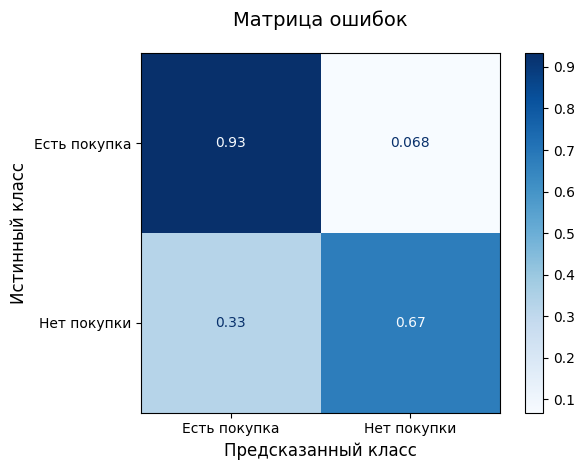

In [74]:
print("\nМетрики:")
print("ROC-AUC:", round(roc_auc_score(y_test, y_pred_proba), 2))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1-Score:", round(f1_score(y_test, y_pred), 2))

# матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=(conf_matrix.T / conf_matrix.sum(axis=1)).T,
    display_labels=['Есть покупка', 'Нет покупки']
)

ax = disp.plot(cmap='Blues')

ax.ax_.set_xlabel('Предсказанный класс', fontsize=12)
ax.ax_.set_ylabel('Истинный класс', fontsize=12)
ax.ax_.set_title('Матрица ошибок', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

Выводы: для бинарной классификации по целевой переменной "Revenue" были выбраны 2 модели: случайный лес и градиентный бустинг.

Для обоих моделей настроен перебор параметров количества деревьев и максимальной глубины дерева (для градиентного бустинга еще скорость обучения). Получились следующие результаты по метрикам:

*   ROC-AUC больше 0.9, что говорит об отличном качестве модели;
*   accuracy, precision, recall и f1-score получились несогласованными, т.к. датасет изначально был несбалансирован, поэтому по ним не стоит оцнивать точность модели.